<a href="https://colab.research.google.com/github/Ashikgurung61/CODSOFT-ML/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 CodSoft
Movie Genre Classification |
Dataset : https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb




In [1]:
import numpy as np
import pandas as pd

#Read the file

In [2]:
D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])

<ipython-input-2-8c7a59d40acf>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])


In [3]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
17548,"""The Dream Team with Annabelle and Michael"" (...",talk-show,The Dream Team with Annabelle and Michael is ...
17549,You Can't Hurry Love (2016),romance,Stunned from the premature passing of a child...
17550,A Little Water (2017),drama,"On the anniversary of a tragic accident, four..."
17551,Life of Josutty (2015),drama,Josutty is the son of Joseph and Shoshamma. H...


In [4]:
D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])

<ipython-input-4-299b8f697a39>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])


In [5]:
D_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
16396,16397,Fields of Valor: The Civil War (2011),The American Civil War is brought to life in ...
16397,16398,Playboy: More Sexy Girls Next Door (2002),Daddy Dan Radlaur is at it again with a total...
16398,16399,In carne e ossa (2009),"In a decaying and solitary mansion, Edward an..."
16399,16400,Misbehaving Ladies (1931),"Ellen, a young American girl who married a Eu..."


In [6]:
D_train.describe()

,TITLE,GENRE,DESCRIPTION
count,17552,17552,17552
unique,17552,27,17535
top,Jump Cut (1993),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,4389,3


In [7]:
D_test.describe()

,ID
count,16401.000000
mean,8201.000000
std,4734.705218
min,1.000000
25%,4101.000000
50%,8201.000000
75%,12301.000000
max,16401.000000


#Check whether there is a noice or null data in a field

In [8]:
D_train.isna()

,TITLE,GENRE,DESCRIPTION
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
17548,False,False,False
17549,False,False,False
17550,False,False,False
17551,False,False,False


In [9]:
D_test.isna()

,ID,TITLE,DESCRIPTION
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
16396,False,False,False
16397,False,False,False
16398,False,False,False
16399,False,False,False


In [10]:
D_train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [11]:
D_test.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [12]:
D_train.shape

(17552, 3)

In [13]:
D_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17552 entries, 1 to 17552
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        17552 non-null  object
 1   GENRE        17552 non-null  object
 2   DESCRIPTION  17552 non-null  object
dtypes: object(3)
memory usage: 548.5+ KB


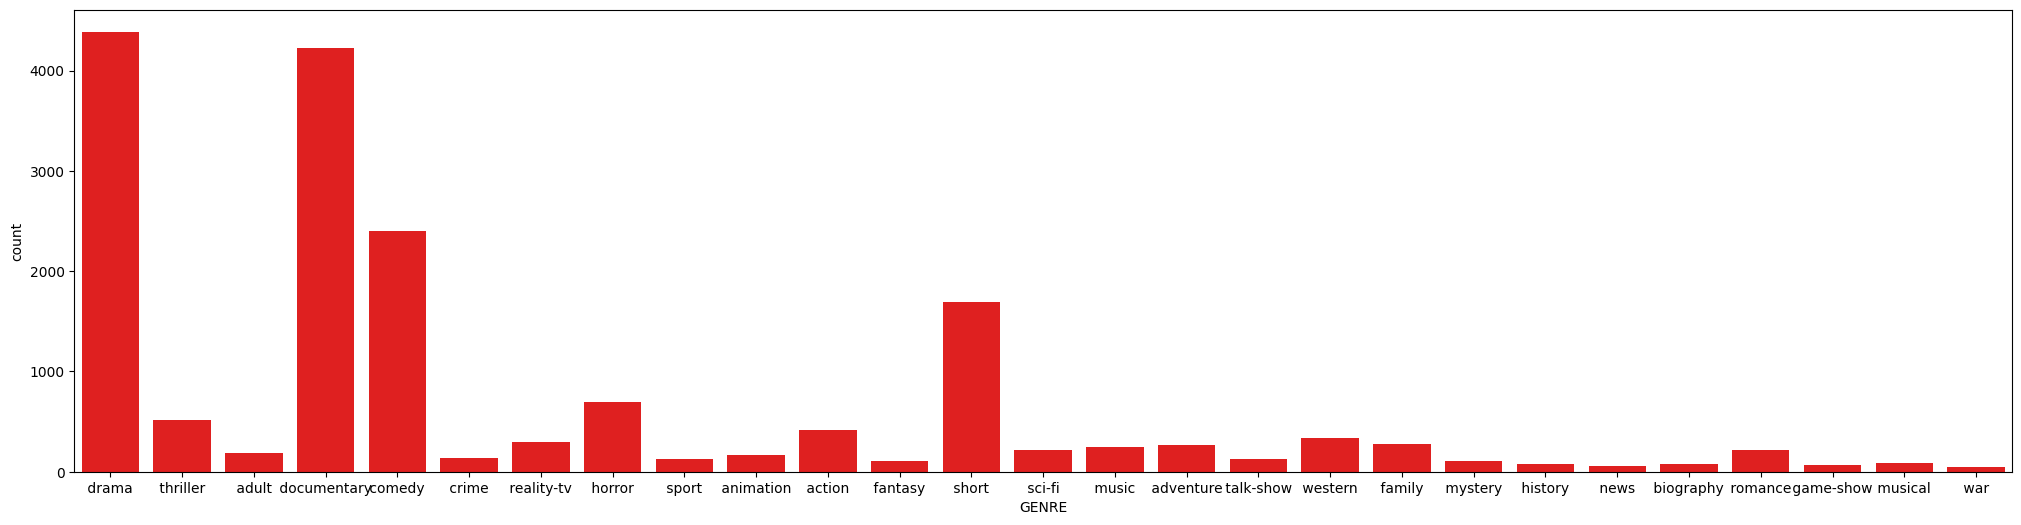

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
sns.countplot(data=D_train, x="GENRE", color = "red")
plt.show()

#Data Cleaning and Preprocessing

In [41]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Download Stopwords

In [16]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
wnl = WordNetLemmatizer()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
stop_words = set(stopwords.words("english"))
import string

def preproc(text):
    text = text.lower()
    text = "".join([word for word in text if word not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    return text

D_train["DESCRIPTION"] = D_train["DESCRIPTION"].apply(preproc)
D_test["DESCRIPTION"] = D_test["DESCRIPTION"].apply(preproc)

In [22]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents year old...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,film title refers recovered bodies ground zero...
...,...,...,...
17548,"""The Dream Team with Annabelle and Michael"" (...",talk-show,dream team annabelle michael reality show vein...
17549,You Can't Hurry Love (2016),romance,stunned premature passing childhood friend rec...
17550,A Little Water (2017),drama,anniversary tragic accident four adults reunit...
17551,Life of Josutty (2015),drama,josutty son joseph shoshamma belongs middle cl...


In [ ]:
#D_train.drop(['TextCleaning'],axis = 1,inplace = True)

In [23]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents year old...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,film title refers recovered bodies ground zero...
...,...,...,...
17548,"""The Dream Team with Annabelle and Michael"" (...",talk-show,dream team annabelle michael reality show vein...
17549,You Can't Hurry Love (2016),romance,stunned premature passing childhood friend rec...
17550,A Little Water (2017),drama,anniversary tragic accident four adults reunit...
17551,Life of Josutty (2015),drama,josutty son joseph shoshamma belongs middle cl...


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(D_train['DESCRIPTION'])
y_test = tf.fit_transform(D_test['DESCRIPTION'])

In [27]:
x = x_train
y = D_train['GENRE']

In [28]:
x

<17552x64005 sparse matrix of type '<class 'numpy.float64'>'
	with 847970 stored elements in Compressed Sparse Row format>

In [29]:
y

1             drama 
2          thriller 
3             adult 
4             drama 
5             drama 
            ...     
17548     talk-show 
17549       romance 
17550         drama 
17551         drama 
17552        comedy 
Name: GENRE, Length: 17552, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 30)

#Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
Train_scores = lr.score(X_train, y_train)
print("Accuracy ", Train_scores * 100)

Accuracy  69.65315860693683


In [34]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([' comedy ', ' drama ', ' comedy ', ..., ' comedy ', ' drama ',
       ' drama '], dtype=object)

In [35]:
ac = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", ac * 100)

Accuracy:  52.37823981771575


#Support Vector Machine

In [36]:
from sklearn.svm import SVC
Support = SVC()

In [37]:
Support.fit(X_train, y_train)

SVC()

In [38]:
Support.score(X_train, y_train)

0.8973719820525604

In [39]:
y_test_preds = Support.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_test_preds)
print("Accuracy: ", accuracy * 100)

Accuracy:  50.52691540871547
